In [1]:
import numpy as np
import matplotlib.pyplot as plt

from loguru import logger

from plot import ecdf
from geogiant.common.files_utils import load_json, load_pickle
from geogiant.common.settings import PathSettings

path_settings = PathSettings()

targets = load_json(path_settings.OLD_TARGETS)
vps = load_json(path_settings.OLD_VPS)

In [2]:
# REFERENCE
ref_error_target = load_pickle(
    path_settings.RESULTS_PATH / "ref_target_geoloc_error.pickle"
)
ref_error_subnet = load_pickle(
    path_settings.RESULTS_PATH / "ref_subnet_geoloc_error.pickle"
)

# ECS-DNS
ecs_dns_error_target = load_pickle(
    path_settings.RESULTS_PATH / "ecs_dns_target_geoloc_error.pickle"
)
ecs_dns_error_subnet = load_pickle(
    path_settings.RESULTS_PATH / "ecs_dns_subnet_geoloc_error.pickle"
)

# MULTI-ITER
multi_iter_error_target = load_pickle(
    path_settings.RESULTS_PATH / "multi_iter_target_geoloc_error.pickle"
)
multi_iter_error_subnet = load_pickle(
    path_settings.RESULTS_PATH / "multi_iter_subnet_geoloc_error.pickle"
)

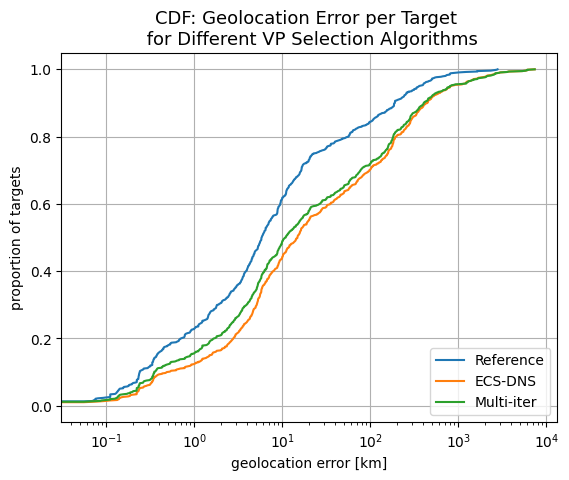

In [3]:
fig, ax1 = plt.subplots(1, 1)

# # plot results for reference vp selection
x, y = ecdf([e for e in ref_error_target.values()])
ax1.plot(x, y, label="Reference")

x, y = ecdf([e for e in ecs_dns_error_target.values()])
ax1.plot(x, y, label="ECS-DNS")

x, y = ecdf([e for e in multi_iter_error_target.values()])
ax1.plot(x, y, label="Multi-iter")

plt.xlabel("geolocation error [km]")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Geolocation Error per Target \n for Different VP Selection Algorithms",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "geoloc_error_all_vp_selection_algo.pdf")
plt.show()

In [4]:
# median errors
ref_median_error_target = np.median([e for e in ref_error_target.values()])
ref_median_error_subnet = np.median([e for e in ref_error_subnet.values()])

ecs_dns_median_error_target = np.median([e for e in ecs_dns_error_target.values()])
ecs_dns_median_error_subnet = np.median([e for e in ecs_dns_error_subnet.values()])

multi_iter_median_error_target = np.median(
    [e for e in multi_iter_error_subnet.values()]
)
multi_iter_median_error_subnet = np.median(
    [e for e in multi_iter_error_subnet.values()]
)

logger.info("Median errors for each vp selection algorithms (TARGET)")
logger.info(
    f"Reference :: median error = {round(ref_median_error_target, 1)} [km] | on {len(ref_error_target)} targets"
)
logger.info(
    f"ECS-DNS   :: median error = {round(ecs_dns_median_error_target, 1)} [km] | on {len(ecs_dns_error_target)} targets"
)
logger.info(
    f"Multi-iter   :: median error = {round(multi_iter_median_error_target, 1)} [km] | on {len(multi_iter_error_target)} targets"
)

logger.info("\n")
logger.info("Median errors for each vp selection algorithms (SUBNET)")
logger.info(
    f"Reference:: median error = {round(ref_median_error_subnet, 1)} [km] | on {len(ref_error_subnet)} subnets"
)
logger.info(
    f"ECS-DNS:: median error = {round(ecs_dns_median_error_subnet, 1)} [km] | on {len(ecs_dns_error_subnet)} subnets"
)
logger.info(
    f"ECS-DNS:: median error = {round(multi_iter_median_error_subnet, 1)} [km] | on {len(multi_iter_error_target)} subnets"
)

2024-02-08 20:26:33.961 | INFO     | __main__:<module>:15 - Median errors for each vp selection algorithms (TARGET)
2024-02-08 20:26:33.962 | INFO     | __main__:<module>:16 - Reference :: median error = 5.9 [km] | on 768 targets
2024-02-08 20:26:33.964 | INFO     | __main__:<module>:19 - ECS-DNS   :: median error = 14.9 [km] | on 759 targets
2024-02-08 20:26:33.965 | INFO     | __main__:<module>:22 - Multi-iter   :: median error = 10.2 [km] | on 760 targets
2024-02-08 20:26:33.967 | INFO     | __main__:<module>:26 - 

2024-02-08 20:26:33.968 | INFO     | __main__:<module>:27 - Median errors for each vp selection algorithms (SUBNET)
2024-02-08 20:26:33.969 | INFO     | __main__:<module>:28 - Reference:: median error = 6.1 [km] | on 745 subnets
2024-02-08 20:26:33.970 | INFO     | __main__:<module>:31 - ECS-DNS:: median error = 13.4 [km] | on 735 subnets
2024-02-08 20:26:33.971 | INFO     | __main__:<module>:34 - ECS-DNS:: median error = 10.2 [km] | on 760 subnets


# Latency distribution

In [5]:
ref_latency_target = load_pickle(
    path_settings.RESULTS_PATH / "ref_target_min_latencies.pickle"
)

ecs_dns_latency_target = load_pickle(
    path_settings.RESULTS_PATH / "ecs_dns_target_min_latencies.pickle"
)

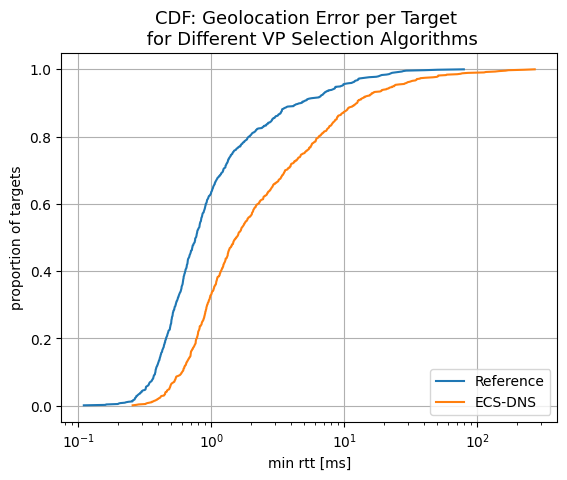

In [6]:
fig, ax1 = plt.subplots(1, 1)


x, y = ecdf([e for e in ref_latency_target.values()])
ax1.plot(x, y, label="Reference")


x, y = ecdf([e for e in ecs_dns_latency_target.values()])
ax1.plot(x, y, label="ECS-DNS")

plt.xlabel("min rtt [ms]")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Geolocation Error per Target \n for Different VP Selection Algorithms",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "geoloc_error_all_vp_selection_algo.pdf")
plt.show()

In [7]:
# median errors
ref_median_median_latency_target = np.median([e for e in ref_latency_target.values()])
ecs_dns_median_median_latency_target = np.median(
    [e for e in ecs_dns_latency_target.values()]
)

multi_iter_median_error_target = np.median(
    [e for e in multi_iter_error_subnet.values()]
)
multi_iter_median_error_subnet = np.median(
    [e for e in multi_iter_error_subnet.values()]
)

logger.info("Median errors for each vp selection algorithms (TARGET)")
logger.info(
    f"Reference :: median error = {round(ref_median_median_latency_target, 1)} [ms] | on {len(ref_error_target)} targets"
)
logger.info(
    f"ECS-DNS   :: median error = {round(ecs_dns_median_median_latency_target, 1)} [ms] | on {len(ecs_dns_error_target)} targets"
)

2024-02-08 20:26:34.691 | INFO     | __main__:<module>:14 - Median errors for each vp selection algorithms (TARGET)
2024-02-08 20:26:34.692 | INFO     | __main__:<module>:15 - Reference :: median error = 0.8 [ms] | on 768 targets
2024-02-08 20:26:34.693 | INFO     | __main__:<module>:18 - ECS-DNS   :: median error = 1.5 [ms] | on 759 targets


# Measurement Cost

In [8]:
m_cost_target_dns = load_pickle(
    path_settings.RESULTS_PATH / "ecs_dns_target_measurement_cost.pickle"
)
m_cost_subnet_dns = load_pickle(
    path_settings.RESULTS_PATH / "ecs_dns_subnet_measurement_cost.pickle"
)

m_cost_target_multi_iter = load_pickle(
    path_settings.RESULTS_PATH / "multi_iter_target_measurement_cost.pickle"
)
m_cost_subnet_multi_iter = load_pickle(
    path_settings.RESULTS_PATH / "multi_iter_subnet_measurement_cost.pickle"
)

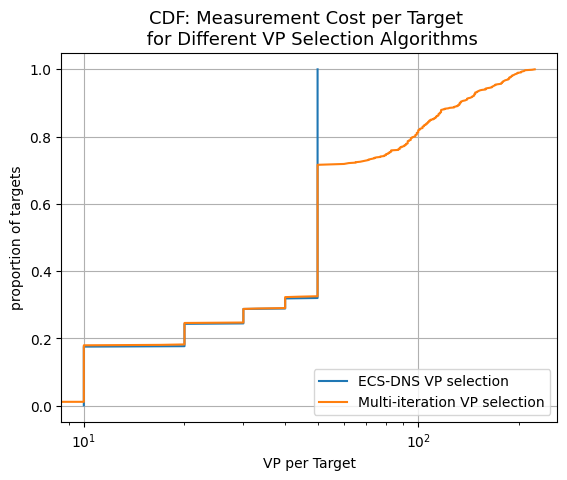

In [9]:
fig, ax1 = plt.subplots(1, 1)

# plot results for dns vp selection algo
x, y = ecdf([m_cost for m_cost in m_cost_target_dns.values()])
ax1.plot(x, y, label="ECS-DNS VP selection")


# plot results for multi iteration vp selection algo
x, y = ecdf([m_cost for m_cost in m_cost_target_multi_iter.values()])

ax1.plot(x, y, label="Multi-iteration VP selection")

plt.xlabel("VP per Target")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.xscale("log")
plt.title(
    f"CDF: Measurement Cost per Target \n for Different VP Selection Algorithms",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "m_cost_all_vp_selection_algo.pdf")
plt.savefig(path_settings.FIGURE_PATH / "m_cost_all_vp_selection_algo.png")
plt.show()

In [10]:
# median measurement cost
median_cost_dns_target = np.mean(
    [cost for cost in m_cost_target_dns.values() if cost > 0]
)
median_cost_dns_subnet = np.mean(
    [cost for cost in m_cost_subnet_dns.values() if cost > 0]
)
overall_cost_dns = sum([cost for cost in m_cost_target_dns.values() if cost > 0])

median_cost_multi_iter_target = np.mean(
    [cost for cost in m_cost_target_multi_iter.values() if cost > 0]
)
median_cost_multi_iter_subnet = np.mean(
    [cost for cost in m_cost_subnet_multi_iter.values() if cost > 0]
)

overall_cost_multi_iter = sum(
    [cost for cost in m_cost_target_multi_iter.values() if cost > 0]
)

logger.info("Median errors for each vp selection algorithms")
logger.info(
    f"ECS-DNS    :: mean cost = {round(median_cost_dns_target, 3)}, {len(m_cost_target_dns)} targets"
)

logger.info(
    f"MULTI-ITER :: mean cost = {np.ceil(median_cost_multi_iter_target)}, {len(m_cost_target_multi_iter)} targets "
)

logger.info("Median errors for each vp selection algorithms subnet")
logger.info(
    f"ECS-DNS    :: mean cost = {np.ceil(median_cost_dns_subnet)}, overall =  {overall_cost_dns}, {len(m_cost_subnet_dns)} subnets"
)
logger.info(
    f"MULTI-ITER :: mean cost = {np.ceil(median_cost_multi_iter_subnet)}, overall = {overall_cost_multi_iter}, {len(m_cost_subnet_multi_iter)} subnets "
)

2024-02-08 20:26:35.209 | INFO     | __main__:<module>:21 - Median errors for each vp selection algorithms
2024-02-08 20:26:35.211 | INFO     | __main__:<module>:22 - ECS-DNS    :: mean cost = 39.74, 768 targets
2024-02-08 20:26:35.212 | INFO     | __main__:<module>:26 - MULTI-ITER :: mean cost = 61.0, 768 targets 
2024-02-08 20:26:35.213 | INFO     | __main__:<module>:30 - Median errors for each vp selection algorithms subnet
2024-02-08 20:26:35.214 | INFO     | __main__:<module>:31 - ECS-DNS    :: mean cost = 109.0, overall =  30520, 732 subnets
2024-02-08 20:26:35.215 | INFO     | __main__:<module>:34 - MULTI-ITER :: mean cost = 169.0, overall = 46324, 732 subnets 
